In [118]:
# Kullanılan kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# Verisetinin yüklenmesi
data = pd.read_csv("winequality-red.csv", sep = ";")

#Veri dağılımını kontrol edelim
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [120]:
# Kolon bilgilerini alalım
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [121]:
# Şarap kalitesi 3 ile 8 arasında değişmekte
data["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Veri Görselleştirme

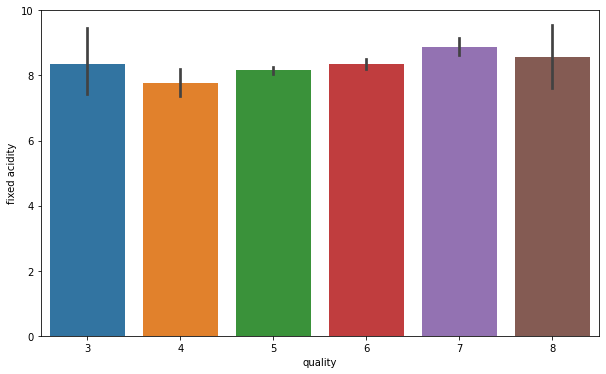

In [122]:
# Kaliteye göre asitlik değerleri (Sabit asitlik kaliteyi sınıflandırmak için yeterli özellik vermiyor)
fig = plt.figure(figsize = (10,6))
sns.barplot(data = data, x = "quality", y = "fixed acidity")

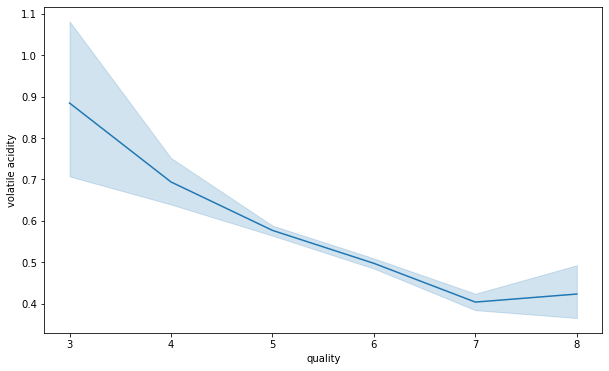

In [123]:
# Kalite yükseldikçe uçucu asitlik düşüş eğilimi göstermekte
fig = plt.figure(figsize = (10,6))
sns.lineplot(data = data, x = "quality", y = "volatile acidity")

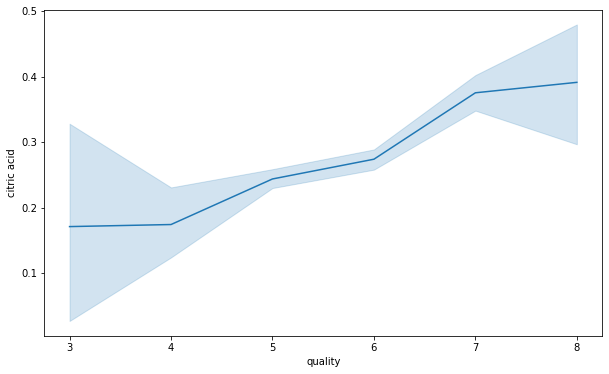

In [124]:
# Şarap kalitesiyle birlikte sitrik asit miktarı da artış göstermekte
fig = plt.figure(figsize = (10,6))
sns.lineplot(data = data, x = "quality", y = "citric acid")

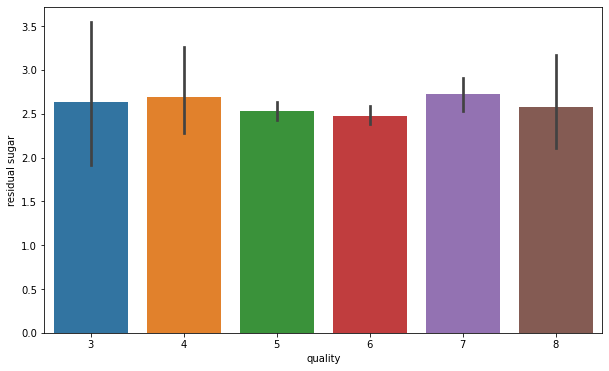

In [125]:
fig = plt.figure(figsize = (10,6))
sns.barplot(data = data, x = "quality", y = "residual sugar")

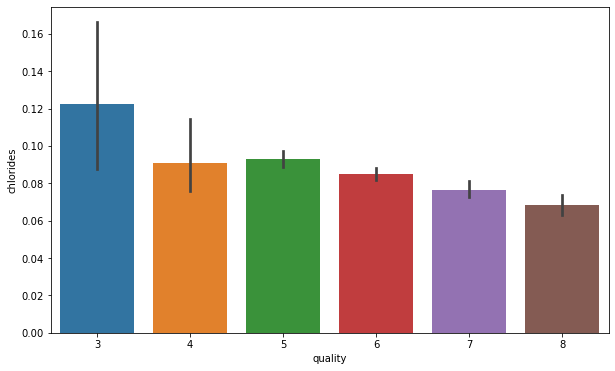

In [126]:
# Klorür bileşimi ve şarap kalitesi (Ters orantı var denebilir. 4 ve 5 kalitedeki şaraplara detaylı bakmak gerek.)
fig = plt.figure(figsize = (10,6))
sns.barplot(data = data, x = "quality", y = "chlorides")

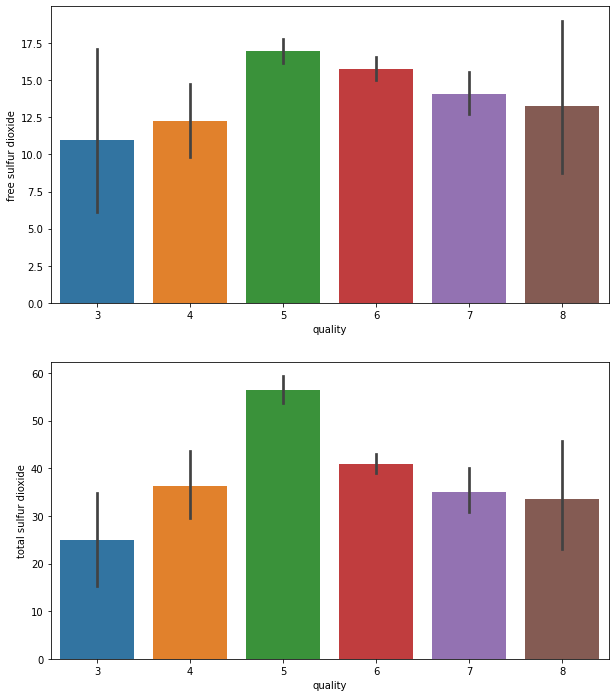

In [127]:
# Sabit/serbest SO₂ miktarı ve şarap kalitesi
fig, axes = plt.subplots(2, 1, figsize = (10,12))
sns.barplot(data = data, x = "quality", y = "free sulfur dioxide", ax = axes[0])
sns.barplot(data = data, x = "quality", y = "total sulfur dioxide", ax = axes[1])

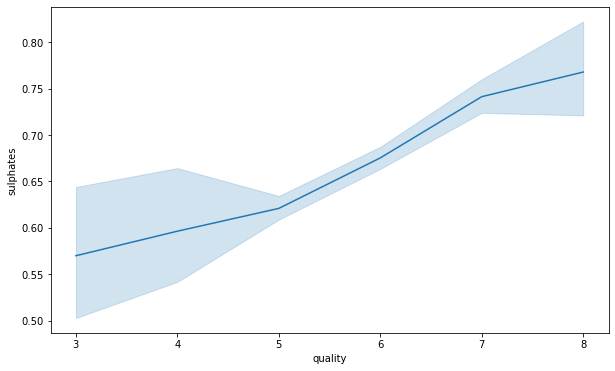

In [128]:
# Şarap kalitesi ile SO₄²- miktarı artmakta
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(data = data, x = "quality", y = "sulphates")

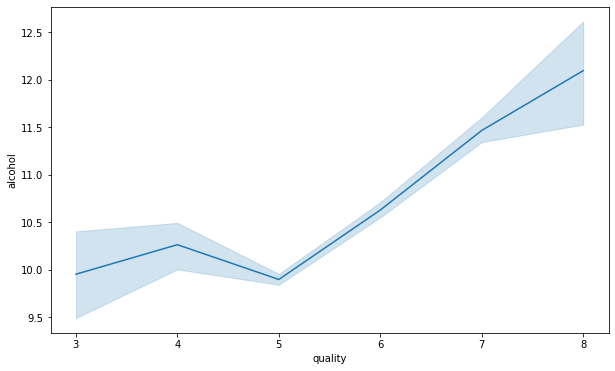

In [129]:
# Şarap kalitesi ile alkol miktarı da artmakta
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(data = data, x = "quality", y = "alcohol")

### Veri Ön İşleme

In [130]:
# Kalite sınırı belirleyerek basit metodoloji ile binary classification uygulanabilir. Sonuç olarak hedef değerimiz "iyi" şarap
# veya "kötü" şarap olacaktır.

bins = (2, 6.5, 8) # kötü < 6.5 < iyi
group_names = ["bad", "good"]
data["quality"] = pd.cut(data["quality"], bins = bins, labels = group_names)

In [137]:
data["quality"].unique()

[bad, good]
Categories (2, object): [bad < good]

### Encoding

In [141]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [142]:
le = LabelEncoder()

In [143]:
data["quality"] = le.fit_transform(data["quality"])

In [145]:
data.quality.head() # Kötü şarap 0 - iyi şarap 1 değerini alır

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

In [148]:
data["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

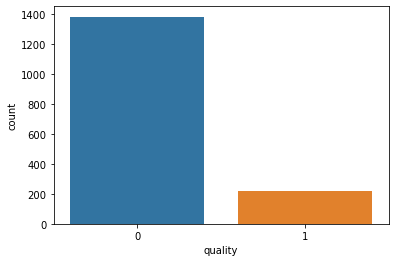

In [149]:
sns.countplot(data["quality"])

### Eğitim ve Test Verisi

In [150]:
X = data.drop("quality", axis = 1) # features
y = data["quality"] # target

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [153]:
# Optimize sonuç elde etmek için ölçekleme
sc = StandardScaler()

In [154]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [166]:
for i in X_train, X_test:
    print("Min:",i.min(),"Max:",i.max())

Min: -3.4559745214287196 Max: 10.972405777139896
Min: -3.7262589728543434 Max: 11.617979091761194


### Eğitim ve Test Verileri Makine Öğrenimi Algoritmaları İçin Hazır

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

In [168]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 250)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [171]:
# Model Performansı
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       349
           1       0.61      0.33      0.43        51

    accuracy                           0.89       400
   macro avg       0.76      0.65      0.68       400
weighted avg       0.87      0.89      0.87       400



In [173]:
# 0 olup 0 tahmin edilenler: 338
# 0 olup 1 tahmin edilenler: 11
# 1 olup 0 tahmin edilenler: 34
# 1 olup 1 tahmin edilenler: 17

# Confusion Matrix
print(confusion_matrix(y_test, pred_rf))

[[338  11]
 [ 34  17]]


In [174]:
# Stochastic Gradient Decent Classifier
sgd = SGDClassifier(penalty = None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [175]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       349
           1       0.38      0.06      0.10        51

    accuracy                           0.87       400
   macro avg       0.63      0.52      0.52       400
weighted avg       0.81      0.87      0.82       400



In [177]:
# 0 olup 0 tahmin edilenler: 344
# 0 olup 1 tahmin edilenler: 5
# 1 olup 0 tahmin edilenler: 48
# 1 olup 1 tahmin edilenler: 3
print(confusion_matrix(y_test, pred_sgd))

[[344   5]
 [ 48   3]]


In [178]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [179]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       349
           1       0.60      0.29      0.39        51

    accuracy                           0.89       400
   macro avg       0.75      0.63      0.67       400
weighted avg       0.87      0.89      0.87       400



### Model Doğruluğunu Arttırmak İçin?

In [180]:
# SVC modeli için en iyi parametrelerin bulunması
param = {
    "C": [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
    "kernel":["linear", "rbf"],
    "gamma" :[0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}

grid_svc = GridSearchCV(svc, param_grid = param, scoring = "accuracy", cv = 10)

In [181]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [183]:
# En iyi parametreler
grid_svc.best_params_

{'C': 1.3, 'gamma': 1.3, 'kernel': 'rbf'}

In [184]:
# SVC modeli en iyi parametreler ile uygulayalım
svc2 = SVC(C = 1.3, gamma =  1.3, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       349
           1       0.90      0.35      0.51        51

    accuracy                           0.91       400
   macro avg       0.91      0.67      0.73       400
weighted avg       0.91      0.91      0.90       400



#### SVC Accuracy: %87 → %91

In [186]:
# Random Forest modeli için Cross Validation
rf_eval = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
rf_eval.mean()

0.9107703081232493

#### Random Forest Accuracy: %87 → %91